In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv("D:/Coding_Project/Python_KaggleChallenge_Titanic/Data/train.csv")
test_data=pd.read_csv("D:/Coding_Project/Python_KaggleChallenge_Titanic/Data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

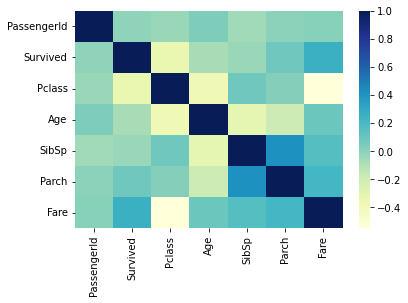

In [4]:
sns.heatmap(train_data.corr(),cmap='YlGnBu')

In [5]:
train_data = train_data.drop(['Name','Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Name','Ticket','Cabin'], axis=1)

In [6]:
train_data.Sex=train_data.Sex.astype('category').cat.codes
test_data.Sex=test_data.Sex.astype('category').cat.codes
train_data.Embarked=train_data.Embarked.astype('category').cat.codes
test_data.Embarked=test_data.Embarked.astype('category').cat.codes

In [7]:
train_data['Age'].fillna(int(train_data['Age'].mean()), inplace=True)
test_data['Age'].fillna(int(test_data['Age'].mean()), inplace=True)
train_data['Embarked'].fillna(int(train_data['Embarked'].mean()), inplace=True)
test_data['Fare'].fillna(int(test_data['Fare'].mean()), inplace=True)

In [8]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,29.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [9]:
x = train_data.copy()
x=np.array(x.drop(['Survived'],1).astype(float))
# x=preprocessing.scale(x)
y = np.array(train_data['Survived'])
clf=KMeans(n_clusters=2)
clf.fit(x)
correct = 0.
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

<ipython-input-9-182685045294>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(x.drop(['Survived'],1).astype(float))


0.49158249158249157


In [10]:
x = train_data.copy()
x=np.array(x.drop(['Survived'],1).astype(float))
x=preprocessing.scale(x)
y = np.array(train_data['Survived'])
clf=KMeans(n_clusters=2)
clf.fit(x)
correct = 0.
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

<ipython-input-10-8a36ec610422>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(x.drop(['Survived'],1).astype(float))


0.6823793490460157


In [11]:
print(clf.labels_)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 

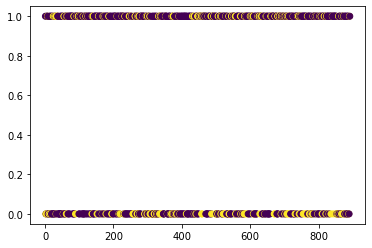

In [21]:
plt.scatter(train_data['PassengerId'],y=train_data['Sex'],c=clf.labels_.astype(float))

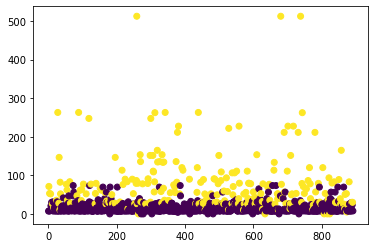

In [22]:
plt.scatter(train_data['PassengerId'],y=train_data['Fare'],c=clf.labels_.astype(float))